# **NOTE BEFORE RUNNING**
It is critical to run the KB code cell once, because Prolog statements persist. Every time we re-add the same rules to prolog, which will cause long running times or cause stack overflow error. If this error occurs we can restart the environment. To prevent this error from occuring and if one wishes to run the code cells again, we can simplt restart the environment too.

In [19]:
!apt-get install -y swi-prolog  # Install SWI-Prolog
!pip install pyswip            # Install PySwip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz gettext gettext-base
  intltool-debian libarchive-cpio-perl libarchive-zip-perl libdebhelper-perl
  libfile-stripnondeterminism-perl libmail-sendmail-perl libossp-uuid16 libsub-override-perl
  libsys-hostname-long-perl libtool po-debconf swi-prolog-core swi-prolog-core-packages
  swi-prolog-doc swi-prolog-nox swi-prolog-x
Suggested packages:
  dh-make gettext-doc libasprintf-dev libgettextpo-dev uuid libtool-doc gcj-jdk libmail-box-perl
  elpa-ediprolog swi-prolog-java swi-prolog-odbc swi-prolog-bdb
The following NEW packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz gettext gettext-base
  intltool-debian libarchive-cpio-perl libarchive-zip-perl libdebhelper-perl
  libfile-stripnondeterminism-perl libmail-sendmail-p

**Initializing Prolog**

In [1]:
from pyswip import Prolog

In [2]:
# Initialize a Prolog instance
prolog = Prolog()

**Defining Operations**

Peano's Axioms Simplified

In [3]:
# Define Peano Arithmetic for Natural Numbers

prolog.assertz("peano(0)")  # Assert that 0 is a natural number according to Peano's axioms.

prolog.assertz("peano(s(X)) :- peano(X)")  # Define the successor function: If X is a natural number, so is s(X).

Addition & Subtraction

In [4]:
# Addition for Natural Numbers

prolog.assertz("add(0, Y, Y) :- peano(Y)")  # Base case for addition: Adding 0 to any natural number Y results in Y.

prolog.assertz("add(s(X), Y, s(Z)) :- add(X, Y, Z)")  # Recursive case for addition until base case is reached: To add s(X) to Y, add X to Y to get Z, then s(Z) is the result.

# Subtraction for Natural Numbers (needed for mod_peano)

prolog.assertz("subtract_peano(X, 0, X) :- peano(X)")  # Base case for subtraction: Subtracting 0 from any natural number X results in X.

prolog.assertz("subtract_peano(s(X), s(Y), Z) :- subtract_peano(X, Y, Z)")  # Recursive case for subtraction until base case is reached: To subtract s(Y) from s(X), subtract Y from X to get Z.

# Example of How Recursion Works in the add Predicate:

# Let's say we want to add s(s(0)) and s(0) (equivalent to 2 + 1 in standard notation):

# 1. add(s(s(0)), s(0), Result)
# 2. This translates to add(s(X), Y, s(Z)), where X = s(0) and Y = s(0).
# 3. According to the recursive rule, we now need to find add(s(0), s(0), Z).
# 4. Again, we use the recursive rule, now X = 0 and Y = s(0).
# 5. Now it matches the base case: add(0, s(0), s(0)). So, Z = s(0).
# 6. Going back one step, we now know Z, so add(s(0), s(0), s(s(0))).
# 7. Finally, going back to the original call, we have add(s(s(0)), s(0), s(s(s(0)))).
# 8. Therefore, the Result of adding s(s(0)) and s(0) is s(s(s(0))) (equivalent to 3 in standard notation).

In [5]:
test_queries = [
        # Addition tests
        ("add(0, s(s(0)), R)", "R = s(s(0))"),
        ("add(s(0), s(s(0)), R)", "R = s(s(s(0)))"),

        # Subtraction tests
        ("subtract_peano(s(s(s(0))), 0, R)", "R = s(s(s(0)))"),
        ("subtract_peano(s(s(s(0))), s(0), R)", "R = s(s(0))"),
    ]

for query, expected_output in test_queries:
  result = list(prolog.query(query))
  print(f"Query: {query}\nExpected Output: {expected_output}\nActual Result: {result}\n")

Query: add(0, s(s(0)), R)
Expected Output: R = s(s(0))
Actual Result: [{'R': 's(s(0))'}]

Query: add(s(0), s(s(0)), R)
Expected Output: R = s(s(s(0)))
Actual Result: [{'R': 's(s(s(0)))'}]

Query: subtract_peano(s(s(s(0))), 0, R)
Expected Output: R = s(s(s(0)))
Actual Result: [{'R': 's(s(s(0)))'}]

Query: subtract_peano(s(s(s(0))), s(0), R)
Expected Output: R = s(s(0))
Actual Result: [{'R': 's(s(0))'}]



Inequalities

In [5]:
# Base case: 0 is less than any successor of a number
prolog.assertz("less_than(0, s(_))")
# This line asserts that 0 is less than the successor of any number. The underscore (_) is a wildcard in Prolog, representing any value. So, for any natural number N, 0 is less than s(N).

# Recursive case: Compare successors
prolog.assertz("less_than(s(X), s(Y)) :- less_than(X, Y)")
# This recursive rule defines that s(X) is less than s(Y) if X is less than Y.
# It effectively shifts the comparison to the predecessors of s(X) and s(Y), allowing the definition to work for all natural numbers by eventually reducing to the base case.

prolog.assertz("equal(0, 0)")
# This asserts that 0 is equal to 0, serving as the base case for equality. Essential for defining equality among natural numbers.

prolog.assertz("equal(s(X), s(Y)) :- equal(X, Y)")
# This recursive rule states that s(X) is equal to s(Y) if X is equal to Y.
# Similar to the less_than predicate, it reduces the problem to a simpler case, ultimately reaching the base case where both numbers are 0.

prolog.assertz("greater_than(X, Y) :- not(less_than(X, Y)), not(equal(X, Y))")
# This line defines the greater_than relation. It states that X is greater than Y if it is not true that X is less than Y and it is not true that X is equal to Y.
# This is an example of defining a relation using the negation of other relations, relying on the previously defined less_than and equal predicates.

# The less_than, equal, and greater_than predicates together provide a complete framework for comparing natural numbers in Peano arithmetic.
# The less_than and equal predicates are defined directly (with base cases and recursive cases), while greater_than is defined indirectly using the negation of less_than and equal.

In [ ]:
# Test queries
test_queries = [
        # Tests for less_than
        ("less_than(0, s(0))", "0 is less than 1"),
        ("less_than(s(0), s(s(0)))", "1 is less than 2"),

        # Tests for equal
        ("equal(s(s(0)), s(s(0)))", "2 is equal to 2"),
        ("equal(0, 0)", "0 is equal to 0"),

        # Tests for greater_than
        ("greater_than(s(s(0)), s(0))", "2 is greater than 1"),
        ("greater_than(s(s(s(0))), s(s(0)))", "3 is greater than 2"),

        ("less_than(s(s(0)), s(0))", False),
        ("less_than(s(s(s(0))), s(s(s(0))))", False),

        # Negative tests for equal
        ("equal(s(0), 0)", False),
        ("equal(s(s(s(0))), s(0))", False),

        # Negative tests for greater_than
        ("greater_than(0, s(s(0)))", False),
        ("greater_than(s(0), s(0))", False)
    ]

for query, expected_output in test_queries:
  result = list(prolog.query(query))
  print(f"Query: {query}\nExpected Output: {expected_output}\nActual Result: {'Yes' if result else 'No'}\n")

Query: less_than(0, s(0))
Expected Output: 0 is less than 1
Actual Result: Yes

Query: less_than(s(0), s(s(0)))
Expected Output: 1 is less than 2
Actual Result: Yes

Query: equal(s(s(0)), s(s(0)))
Expected Output: 2 is equal to 2
Actual Result: Yes

Query: equal(0, 0)
Expected Output: 0 is equal to 0
Actual Result: Yes

Query: greater_than(s(s(0)), s(0))
Expected Output: 2 is greater than 1
Actual Result: Yes

Query: greater_than(s(s(s(0))), s(s(0)))
Expected Output: 3 is greater than 2
Actual Result: Yes

Query: less_than(s(s(0)), s(0))
Expected Output: False
Actual Result: No

Query: less_than(s(s(s(0))), s(s(s(0))))
Expected Output: False
Actual Result: No

Query: equal(s(0), 0)
Expected Output: False
Actual Result: No

Query: equal(s(s(s(0))), s(0))
Expected Output: False
Actual Result: No

Query: greater_than(0, s(s(0)))
Expected Output: False
Actual Result: No

Query: greater_than(s(0), s(0))
Expected Output: False
Actual Result: No



Multiplication, Division, Devision in Fractional Form

In [6]:
# Multiplication for Natural Numbers

prolog.assertz("mult(0, _, 0)")
# This line states that multiplying 0 by any number results in 0. This serves as one base case for multiplication.

prolog.assertz("mult(_, 0, 0)")
# Similar to the first line, this asserts that multiplying any number by 0 also results in 0, establishing another base case for multiplication.

prolog.assertz("mult(s(X), Y, Z) :- mult(X, Y, XY), add(Y, XY, Z)")
# This line defines the recursive step for multiplication. To multiply s(X) (the successor of X) by Y, first multiply X by Y to get XY, and then add Y to XY to get Z.
# This effectively implements the concept of 'repeated addition' for multiplication.


# Division for Natural Numbers (Needed for Simplifying Fractions)

prolog.assertz("div_peano(X, Y, Z) :- div_peano_helper(X, Y, 0, Z)")
# This line initializes the division operation.
# It sets up a helper predicate to handle the division process, starting with an accumulator set to 0.

prolog.assertz("div_peano_helper(X, Y, Acc, Acc) :- less_than(X, Y)")
# This is a base case for the division helper. If X is less than Y, the division process stops, and the current accumulator value is the result.

prolog.assertz("div_peano_helper(X, Y, Acc, Result) :- not(less_than(X, Y)), subtract_peano(X, Y, X1), div_peano_helper(X1, Y, s(Acc), Result)")
# This is the recursive case for division. If X is not less than Y, it subtracts Y from X, increments the accumulator, and continues the process recursively.
# This essentially counts how many times Y can be subtracted from X before X becomes less than Y.

# The multiplication predicates define multiplication as repeated addition, following the principles of Peano arithmetic.
# The division operation is handled through a helper predicate that uses subtraction and recursion to determine how many times the divisor can be subtracted from the dividend.

In [ ]:
test_queries = [
        # Tests for multiplication
        ("mult(0, s(s(0)), R)", "R = 0 (0 * 2 = 0)"),
        ("mult(s(s(0)), s(s(s(0))), R)", "R = s(s(s(s(s(s(0)))))) (2 * 3 = 6)"),

        # Tests for division
        ("div_peano(s(s(s(s(0)))), s(s(0)), R)", "R = s(s(0)) (4 / 2 = 2)"),
        ("div_peano(s(s(s(s(s(0))))), s(s(0)), R)", "R = s(s(0)) (5 / 2 = 2)"),
        ("div_peano(s(s(0)), s(s(s(0))), R)", "R = 0 (2 / 3 = 0)"),
    ]

for query, expected_output in test_queries:
  result = list(prolog.query(query))
  print(f"Query: {query}\nExpected Output: {expected_output}\nActual Result: {result}\n")

Query: mult(0, s(s(0)), R)
Expected Output: R = 0 (0 * 2 = 0)
Actual Result: [{'R': 0}]

Query: mult(s(s(0)), s(s(s(0))), R)
Expected Output: R = s(s(s(s(s(s(0)))))) (2 * 3 = 6)
Actual Result: [{'R': 's(s(s(s(s(s(0))))))'}]

Query: div_peano(s(s(s(s(0)))), s(s(0)), R)
Expected Output: R = s(s(0)) (4 / 2 = 2)
Actual Result: [{'R': 's(s(0))'}]

Query: div_peano(s(s(s(s(s(0))))), s(s(0)), R)
Expected Output: R = s(s(0)) (5 / 2 = 2)
Actual Result: [{'R': 's(s(0))'}]

Query: div_peano(s(s(0)), s(s(s(0))), R)
Expected Output: R = 0 (2 / 3 = 0)
Actual Result: [{'R': 0}]



Representing Fractions

In [22]:
# Fraction Representation (X/Y)
prolog.assertz("fraction(frac(X, Y)) :- peano(X), peano(Y), not(equal(Y, 0))")
# This line defines a valid fraction in terms of Peano numbers. It asserts that a fraction is valid (frac(X, Y)) if X and Y are Peano numbers and Y is not equal to 0 (to avoid division by zero).

# Convert Peano Number to Fraction
prolog.assertz("peano_to_frac(X, frac(X, s(0))) :- peano(X)")
# This asserts the conversion of a Peano number to a fraction.
# A Peano number X is represented as a fraction frac(X, s(0)), where s(0) represents 1 in Peano arithmetic, effectively converting a whole number to its fractional equivalent (X/1).

# Modulus for Natural Numbers
prolog.assertz("mod_peano(X, Y, Z) :- less_than(X, Y), Z = X")
# Base case for modulus: If X is less than Y, then the modulus (X mod Y) is X itself.

prolog.assertz("mod_peano(X, Y, Z) :- not(less_than(X, Y)), subtract_peano(X, Y, Result), mod_peano(Result, Y, Z)")
# Recursive case for modulus: If X is not less than Y, subtract Y from X and recursively find the modulus of the result with Y. This continues until X is less than Y.

# Simplify Fractions
prolog.assertz("gcd(X, 0, X) :- peano(X)")
# Base case for calculating the greatest common divisor (gcd): If one of the numbers is 0, the gcd is the other number.

prolog.assertz("gcd(X, Y, Result) :- not(equal(Y, 0)), mod_peano(X, Y, Mod), gcd(Y, Mod, Result)")
# Recursive case for gcd: Uses the Euclidean algorithm. If Y is not 0, find the modulus of X and Y (Mod), then recursively find the gcd of Y and Mod.

prolog.assertz("simplify_frac(frac(X, Y), frac(Xs, Ys)) :- gcd(X, Y, G), div_peano(X, G, Xs), div_peano(Y, G, Ys)")
# This line defines how to simplify a fraction. First, it finds the gcd of the numerator and denominator.
# Then it divides both the numerator and the denominator by the gcd to get the simplified fraction.

# These predicates together allow for the representation and manipulation of fractions in terms of Peano numbers.
# They include defining valid fractions, converting Peano numbers to fractional form, computing the modulus, and simplifying fractions by finding and using the greatest common divisor.

In [ ]:
test_cases = [
    ("peano_to_frac(s(s(0)), R)", "Convert 2 to fraction"),
    ("mod_peano(s(s(s(0))), s(s(0)), R)", "3 mod 2"),
    ("simplify_frac(frac(s(s(s(s(0)))), s(s(s(0)))), R)", "Simplify 4/3"),
    ("simplify_frac(frac(s(s(0)), s(s(s(s(0))))), R)", "Simplify 2/4")
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, result))

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

Test: Convert 2 to fraction 
Result: [{'R': 'frac(s(s(0)), s(0))'}]

Test: 3 mod 2 
Result: [{'R': 's(0)'}]

Test: Simplify 4/3 
Result: [{'R': 'frac(s(s(s(s(0)))), s(s(s(0))))'}]

Test: Simplify 2/4 
Result: [{'R': 'frac(s(0), s(s(0)))'}]



Division with fractional part

In [15]:
# Division with a Fractional Part

prolog.assertz("div_peano_frac(X, Y, Result) :- div_peano_helper(X, Y, 0, Quotient), mod_peano(X, Y, Remainder), (less_than(Remainder, s(0)) -> Result = Quotient; Result = frac(X, Y))")
# This line defines division with a fractional part using Peano arithmetic. The process involves three main steps:
# 1. Compute the Quotient: Using div_peano_helper, it calculates the integer quotient of X divided by Y, starting with an accumulator of 0.
# 2. Calculate the Remainder: It uses mod_peano to find the remainder of X divided by Y.
# 3. Determine the Result: If the Remainder is less than s(0) (which represents 1 in Peano arithmetic), the result of the division is just the Quotient.
# Otherwise, the result is represented as a fraction frac(X, Y). This conditional effectively checks if there's a remainder.
# If there is no remainder (i.e., a complete division), the result is a whole number (Quotient). If there is a remainder, the result is a fraction representing the incomplete division.

# This predicate allows for the division of Peano numbers, providing an outcome as either a whole number or a fractional representation, depending on whether the division is exact or has a remainder.
# This approach aligns with traditional arithmetic where division results can be expressed either as whole numbers or as fractions.

In [16]:
# Test cases
test_cases = [
    # Exact Division
    ("div_peano_frac(s(s(s(s(0)))), s(s(0)), Result)", "Exact division 4 / 2"),
    # Non-Exact Division
    ("div_peano_frac(s(s(s(s(s(0))))), s(s(s(0))), Result)", "Non-exact division 5 / 3"),
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, result))

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

PrologError: ignored

Fraction Multiplication & Division

In [9]:
# Fraction Addition and Multiplication

prolog.assertz("add_frac(frac(X1, Y1), frac(X2, Y2), Result) :- mult(X1, Y2, Temp1), mult(X2, Y1, Temp2), add(Temp1, Temp2, Numerator), mult(Y1, Y2, Denominator), simplify_frac(frac(Numerator, Denominator), Result)")
# This line defines the addition of two fractions. The numerators are multiplied by the opposite denominators (cross-multiplication) and then added together.
# The denominators are multiplied together. The resulting fraction is then simplified.

prolog.assertz("mult_frac(frac(X1, Y1), frac(X2, Y2), Result) :- mult(X1, X2, Numerator), mult(Y1, Y2, Denominator), simplify_frac(frac(Numerator, Denominator), Result)")
# This line defines the multiplication of two fractions. The numerators are multiplied together, and the denominators are also multiplied together. The resulting fraction is then simplified.

prolog.assertz("subtract_frac(frac(X1, Y1), frac(X2, Y2), Result) :- mult(X1, Y2, Temp1), mult(X2, Y1, Temp2), subtract_peano(Temp1, Temp2, Numerator), mult(Y1, Y2, Denominator), simplify_frac(frac(Numerator, Denominator), Result)")
# This line defines the subtraction of two fractions. It follows a similar process to addition: cross-multiplying the numerators and denominators and then subtracting the resulting numerators.
# The denominators are multiplied together. The resulting fraction is then simplified.

# Fraction Inversion and Division

prolog.assertz("invert_frac(frac(X, Y), frac(Y, X)) :- not(equal(Y, 0))")
# This line defines the inversion (reciprocal) of a fraction, swapping the numerator and the denominator, as long as the original denominator is not zero.

prolog.assertz("div_frac(frac(X1, Y1), frac(X2, Y2), Result) :- invert_frac(frac(X2, Y2), Inverse), mult_frac(frac(X1, Y1), Inverse, Result)")
# This line defines division of fractions. It inverts the second fraction and then multiplies it with the first fraction. The result is simplified implicitly within the mult_frac predicate.

# These predicates enable arithmetic operations on fractions represented in Peano arithmetic.
# They follow the standard rules of fraction arithmetic, including cross-multiplication for addition and subtraction, direct multiplication of numerators and denominators for multiplication, and multiplication with the reciprocal for division.
# Each operation ensures the resulting fraction is in its simplest form.

In [ ]:
test_cases = [
    # Fraction Addition
    ("add_frac(frac(s(0), s(s(0))), frac(s(0), s(s(0))), Result)", "Add fractions 1/2 + 1/2"),
    # Fraction Multiplication
    ("mult_frac(frac(s(0), s(s(0))), frac(s(0), s(s(0))), Result)", "Multiply fractions 1/2 * 1/2"),
    # Fraction Subtraction
    ("subtract_frac(frac(s(s(0)), s(s(s(0)))), frac(s(0), s(s(s(0)))), Result)", "Subtract fractions 2/3 - 1/3"),
    # Fraction Division
    ("div_frac(frac(s(s(0)), s(s(0))), frac(s(0), s(s(0))), Result)", "Divide fractions 2/2 ÷ 1/2"),
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, result))

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

Test: Add fractions 1/2 + 1/2 
Result: [{'Result': 'frac(s(0), s(0))'}]

Test: Multiply fractions 1/2 * 1/2 
Result: [{'Result': 'frac(s(0), s(s(s(s(0)))))'}]

Test: Subtract fractions 2/3 - 1/3 
Result: [{'Result': 'frac(s(0), s(s(s(0))))'}]

Test: Divide fractions 2/2 ÷ 1/2 
Result: [{'Result': 'frac(s(s(0)), s(0))'}]



Check for Prime

In [10]:
# Prime Number Definition

prolog.assertz("is_prime(s(s(0)))")
# This line asserts that the number 2 (represented as s(s(0)) in Peano arithmetic) is a prime number. This is a base case and is true since 2 is the smallest prime number.

prolog.assertz("is_prime(X) :- peano(X), not(has_divisor(X, s(s(0))))")
# This line defines a general rule for a number to be considered prime. A number X is prime if it is a Peano number (natural number) and does not have any divisors starting from 2 (s(s(0))).
# This rule checks if there are no divisors of X other than 1 and X itself.

# Helper Predicates for Prime Number Checking

prolog.assertz("has_divisor(X, Y) :- less_than(Y, X), mod_peano(X, Y, 0)")
# This line defines a condition where a number X has a divisor Y. If Y is less than X and the modulus of X divided by Y is 0, it means Y is a divisor of X.

prolog.assertz("has_divisor(X, Y) :- less_than(Y, X), not(mod_peano(X, Y, 0)), next_number(Y, Y1), has_divisor(X, Y1)")
# This line is a recursive definition for finding a divisor. If Y is not a divisor of X (i.e., X mod Y is not 0), it moves to the next number Y1 and checks if Y1 is a divisor of X.
# This continues until a divisor is found or all numbers less than X are checked.

prolog.assertz("next_number(X, s(X)) :- peano(X)")
# This line defines the successor of a number X in Peano arithmetic. It is used in the process of checking for divisors by iterating through numbers less than X.

# Summary:
# The is_prime predicate defines prime numbers in Peano arithmetic. It relies on has_divisor to check for divisibility and uses next_number for iterating through potential divisors.
# A number is considered prime if it has no divisors other than 1 and itself.

In [ ]:
test_cases = [
    # Prime Numbers
    ("is_prime(s(s(0)))", "Is 2 prime?"),
    ("is_prime(s(s(s(0))))", "Is 3 prime?"),
    ("is_prime(s(s(s(s(s(0))))))", "Is 5 prime?"),
    # Non-Prime Numbers
    ("is_prime(s(s(s(s(0)))))", "Is 4 prime?"),
    ("is_prime(s(s(s(s(s(s(0)))))))", "Is 6 prime?"),
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, bool(result)))  # Convert to bool for clarity

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

Test: Is 2 prime? 
Result: True

Test: Is 3 prime? 
Result: True

Test: Is 5 prime? 
Result: True

Test: Is 4 prime? 
Result: False

Test: Is 6 prime? 
Result: False



Factorials, Exponents, Roots

In [11]:
# Factorial

prolog.assertz("factorial(0, s(0))")
# This asserts the base case for the factorial function: the factorial of 0 is 1, represented in Peano arithmetic as s(0).

prolog.assertz("factorial(s(X), Y) :- factorial(X, Temp), mult(s(X), Temp, Y)")
# This is the recursive case for the factorial function. It states that the factorial of s(X) (which is X+1 in traditional arithmetic) is s(X) multiplied by the factorial of X.
# Temp is the factorial of X, and Y is the result of multiplying s(X) and Temp.

# Power of

prolog.assertz("power(_, 0, s(0))")
# Base case for the power function: any number raised to the power of 0 is 1, represented as s(0) in Peano arithmetic.

prolog.assertz("power(X, s(Y), Z) :- power(X, Y, Temp), mult(X, Temp, Z)")
# Recursive case for the power function. To calculate X raised to the power of s(Y), first calculate X raised to the power of Y (stored in Temp), then multiply X by Temp to get Z.

# Square Root

# Base case: The square root of 0 is 0
prolog.assertz("sqrt_peano(0, 0)")
# This asserts that the square root of 0 is 0, serving as the base case for the square root function.

# Recursive Definition for Square Root
prolog.assertz("sqrt_peano(X, Y) :- sqrt_helper(X, 0, Y)")
# This initializes the square root calculation by calling a helper function with an accumulator set to 0.

prolog.assertz("sqrt_helper(X, Acc, Acc) :- power(Acc, s(s(0)), P), not(less_than(P, X))")
# This is the base case for the helper function. It checks if the square of the accumulator is not less than X. If true, the accumulator is the square root.

prolog.assertz("sqrt_helper(X, Acc, Result) :- power(Acc, s(s(0)), P), less_than(P, X), sqrt_helper(X, s(Acc), Result)")
# This is the recursive case for the helper function. If the square of the accumulator is less than X, increment the accumulator and call the function recursively until the base case is met.

# Summary:
# The factorial predicate calculates the factorial of a Peano number. The power predicate computes the power of a Peano number raised to another Peano number.
# The sqrt_peano predicate calculates the square root of a Peano number using a helper function to incrementally find the square root by comparing squares of numbers to the input.

In [ ]:
# Test cases
test_cases = [
    # Factorial Tests
    ("factorial(0, Result)", "Factorial of 0"),
    ("factorial(s(0), Result)", "Factorial of 1"),
    ("factorial(s(s(s(0))), Result)", "Factorial of 3"),
    # Power Tests
    ("power(s(s(0)), s(s(s(0))), Result)", "2 to the power of 3"),
    ("power(s(s(s(0))), s(s(0)), Result)", "3 to the power of 2"),
    # Square Root Tests
    ("sqrt_peano(s(s(s(s(0)))), Result)", "Square root of 4"),
    ("sqrt_peano(s(s(s(s(s(s(s(s(s(0))))))))), Result)", "Square root of 9"),
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, result))

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

Test: Factorial of 0 
Result: [{'Result': 's(0)'}]

Test: Factorial of 1 
Result: [{'Result': 's(0)'}]

Test: Factorial of 3 
Result: [{'Result': 's(s(s(s(s(s(0))))))'}]

Test: 2 to the power of 3 
Result: [{'Result': 's(s(s(s(s(s(s(s(0))))))))'}]

Test: 3 to the power of 2 
Result: [{'Result': 's(s(s(s(s(s(s(s(s(0)))))))))'}]

Test: Square root of 4 
Result: [{'Result': 's(s(0))'}, {'Result': 's(s(0))'}]

Test: Square root of 9 
Result: [{'Result': 's(s(s(0)))'}, {'Result': 's(s(s(0)))'}]



Simple linear equation in the form CY−B=AX.

In [12]:
# Linear Equation Solver

prolog.assertz("solve_for_x(A, B, C, Y, X) :- mult(C, Y, CY), subtract_peano(CY, B, Result), div_peano_frac(Result, A, X)")
# This line defines a predicate to solve a linear equation of the form AX + B = CY for X. The steps are as follows:
# 1. Multiply C and Y to get CY. This corresponds to computing the right-hand side of the equation.
# 2. Subtract B from CY to isolate AX (Result). This operation effectively shifts B to the other side of the equation, changing its sign.
# 3. Divide the Result by A to solve for X. This step uses div_peano_frac, which can handle division with a fractional part, accommodating cases where A does not perfectly divide the Result.

# Summary:
# This predicate provides a way to solve a simple linear equation in Peano arithmetic.
# The use of mult (for multiplication), subtract_peano (for subtraction), and div_peano_frac (for division) allows the solution to be obtained in terms of Peano's natural numbers and fractions.

In [ ]:
test_cases = [
    # Test linear equation Ax + B = CY, solve for X
    # Test Case 1: 2x + 3 = 5y, solve for x when y = 2 (s(s(0)))
    ("solve_for_x(s(s(0)), s(s(s(0))), s(s(s(0))), s(s(0)), X)", "Solve 2x + 3 = 3y for x when y = 2"),
    # Test Case 2: 3x + 1 = 4y, solve for x when y = 3 (s(s(s(0))))
    ("solve_for_x(s(s(s(0))), s(0), s(s(s(s(0)))), s(s(s(0))), X)", "Solve 3x + 1 = 4y for x when y = 3"),
]

# Execute tests
test_results = []
for query, description in test_cases:
    result = list(prolog.query(query))
    test_results.append((description, result))

for test in test_results:
    print(f"Test: {test[0]} \nResult: {test[1]}\n")

Test: Solve 2x + 3 = 3y for x when y = 2 
Result: [{'X': 'frac(s(s(s(0))), s(s(0)))'}]

Test: Solve 3x + 1 = 4y for x when y = 3 
Result: [{'X': 'frac(s(s(s(s(s(s(s(s(s(s(s(0))))))))))), s(s(s(0))))'}]



**Interface**

In [8]:
import re

def peano_to_int(peano_str):
    """
    Convert a Peano number representation (as a string) to a Python integer.
    Peano number is represented as successive applications of 's', e.g., 's(s(s(0)))' for 3.
    """
    return peano_str.count('s(')

def process_prolog_output(query_result):
    """
    Convert Prolog output containing Peano numbers to Python integers or fractions in string format.
    """
    result = {}
    for var, value in query_result.items():
        # Check if the value represents a fraction
        frac_match = re.search(r'frac\((.*), (.*)\)', value)
        if frac_match:
            numerator, denominator = frac_match.groups()
            numerator_val = peano_to_int(numerator)
            denominator_val = peano_to_int(denominator)
            result[var] = f"{numerator_val}/{denominator_val}"
        else:
            # Convert direct Peano numbers
            result[var] = peano_to_int(value)
    return result

# Example usage
prolog_output = [
    {'R': 'frac(s(s(s(0))), s(s(0)))'},  # Inverting 2/3
    {'R': 'frac(s(0), s(s(s(0))))'},     # Dividing 2/3 by 2/1
    {'R': 's(s(0))'},                    # 2!
    {'R': 's(s(s(s(s(s(0))))))'},        # 3!
    {'R': 's(s(s(s(0))))'},              # 2^2
    {'R': 's(s(s(s(s(s(s(s(0))))))))'},  # 2^3
    {'X': 's(s(s(s(s(s(s(s(0))))))))'}   # solve_for_x example
]

# Process each query result
for output in prolog_output:
    print(process_prolog_output(output))

{'R': '3/2'}
{'R': '1/3'}
{'R': 2}
{'R': 6}
{'R': 4}
{'R': 8}
{'X': 8}


In [9]:
def fraction_to_peano(fraction):
    """
    Convert a Python fraction (numerator, denominator) to its Peano number representation.
    """
    numerator, denominator = fraction
    peano_numerator = int_to_peano(numerator)
    peano_denominator = int_to_peano(denominator)
    return f'frac({peano_numerator}, {peano_denominator})'

def int_to_peano(n):
    # Existing function to convert integers to Peano numbers
    if n == 0:
        return '0'
    else:
        return 's(' + int_to_peano(n - 1) + ')'

# Example usage
print(fraction_to_peano((2, 3)))  # Should print 'frac(s(s(0)), s(s(s(0))))'
print(fraction_to_peano((5, 7)))  # Should print 'frac(s(s(s(s(s(0))))), s(s(s(s(s(s(s(0))))))))'

frac(s(s(0)), s(s(s(0))))
frac(s(s(s(s(s(0))))), s(s(s(s(s(s(s(0))))))))


In [25]:
def process_input_and_return_prolog_query(input_string):
    # Split the input string to identify operands and the operation
    input_string = input_string.replace('', ' ')
    parts = input_string.split()

    if len(parts) != 3:
        return "Invalid input. Expected format: 'operand1 operation operand2'."

    operand1, operation, operand2 = parts

    # Check if the operation is a valid operator
    valid_operators = ['+', '-', '*', '/']
    if operation not in valid_operators:
        return "Invalid operation. Supported operations are +, -, *, /."

    # Convert operands to integers
    try:
        operand1_int = int(operand1)
        operand2_int = int(operand2)
    except ValueError:
        return "Invalid operands. Operands must be integers."

    # Convert operands to Peano notation
    operand1_peano = int_to_peano(operand1_int)
    operand2_peano = int_to_peano(operand2_int)

    # Construct the Prolog query
    if operation == '+':
        return f"add({operand1_peano}, {operand2_peano}, R)"
    elif operation == '-':
        return f"subtract_peano({operand1_peano}, {operand2_peano}, R)"
    elif operation == '*':
        return f"mult({operand1_peano}, {operand2_peano}, R)"
    elif operation == '/':
        return f"div_peano_frac({operand1_peano}, {operand2_peano}, R)"
    else:
        return "Unsupported operation."

In [26]:
def process_query(query):
  print(query)
  try:
      solutions = list(prolog.query(query))
      if solutions:
          result = solutions[0]['R']  # Assuming 'R' is the variable for result
          # Check if the result represents a fraction
          frac_match = re.search(r'frac\((.*), (.*)\)', result)
          if frac_match:
              numerator, denominator = frac_match.groups()
              numerator_val = peano_to_int(numerator)
              denominator_val = peano_to_int(denominator)
              return f"{numerator_val}/{denominator_val}"
          else:
              return peano_to_int(result)
      else:
          return "No solution found."
  except Exception as e:
      return f"Prolog query failed: {e}"

In [27]:
process_query("add(s(s(s(0))), s(s(0)), R)")

add(s(s(s(0))), s(s(0)), R)


5

In [28]:
import ipywidgets as widgets
from IPython.display import display

class Calculator:
    def __init__(self):
        # Styling constants
        button_layout = widgets.Layout(width='auto', height='40px')
        button_style = 'info'  # Other options: 'success', 'info', 'warning', 'danger' or ''
        input_text_style = {'description_width': 'initial'}

        # Text widget for input
        self.input_text = widgets.Text(description='Input:', style=input_text_style)

        # Buttons for digits and operations
        self.digit_buttons = [widgets.Button(description=str(i), layout=button_layout, button_style=button_style) for i in range(10)]
        self.operation_buttons = [
            widgets.Button(description=op, layout=button_layout, button_style=button_style)
            for op in ['+', '-', '*', '/', '%', '!', '^', '√', '(', ')', 'Prime?', ':', '>', '<', '==']
        ]
        self.clear_button = widgets.Button(description='Clear', layout=button_layout, button_style='danger')
        self.backspace_button = widgets.Button(description='Backspace', layout=button_layout, button_style='warning')
        self.calculate_button = widgets.Button(description='Calculate', layout=button_layout, button_style='success')
        self.input_text = widgets.Text(description='Input:', style=input_text_style)
        self.current_input = ""

        # Output widget
        self.output = widgets.Output()

        # Set up the layout
        self.setup_layout()

        # Set button click events
        for button in self.digit_buttons + self.operation_buttons + [self.clear_button, self.backspace_button]:
            button.on_click(self.append_to_input)

        # Set click event for the Calculate button
        self.calculate_button.on_click(self.perform_calculation)

    def setup_layout(self):
        # Creating rows for a more traditional calculator layout
        digit_rows = [widgets.HBox(self.digit_buttons[i:i + 3]) for i in range(0, len(self.digit_buttons), 3)]
        operations_row = widgets.HBox(self.operation_buttons)
        control_row = widgets.HBox([self.clear_button, self.backspace_button, self.calculate_button])
        layout = widgets.VBox([self.input_text] + digit_rows + [operations_row, control_row, self.output])
        display(layout)

    def append_to_input(self, button):
        if button.description == 'Clear':
            self.current_input = ''  # Clear the current input
            self.input_text.value = ''  # Clear the input text field
        elif button.description == 'Backspace':
            self.current_input = self.current_input[:-1]  # Remove the last character from current input
            self.input_text.value = self.current_input  # Update the input text field
        else:
            self.current_input += button.description  # Append the clicked button's description
            self.input_text.value = self.current_input  # Update the input text field

    def perform_calculation(self, button):
      input_str = self.current_input  # Use the current input for calculation
      query = process_input_and_return_prolog_query(input_str)

In [29]:
# To use the calculator, create an instance of the Calculator class
# Works for single digit queries, unfortunately not all functionalities could be added in time except +, -, *, /
calculator = Calculator()

['8', '/', '2']
div_peano_frac(s(s(s(s(s(s(s(s(0)))))))), s(s(0)), R)
4


**Complexity**

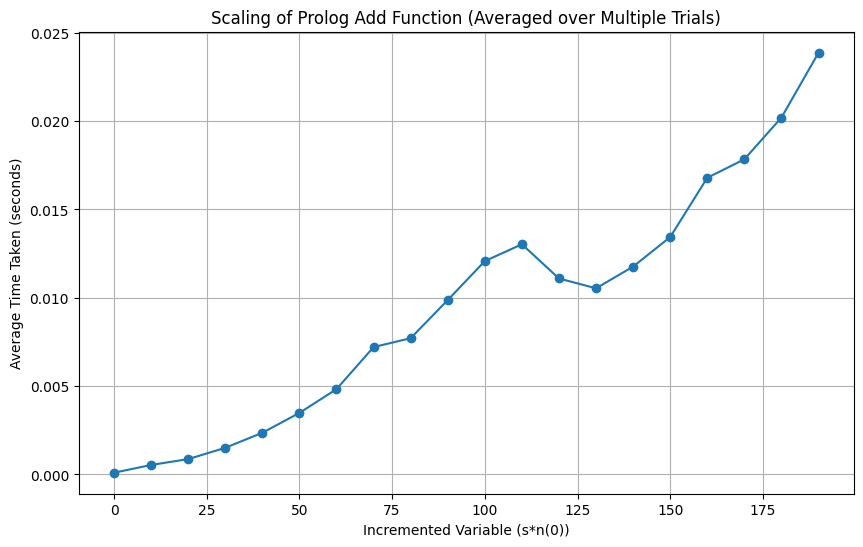

In [34]:
import matplotlib.pyplot as plt
import time

# Function to add two numbers using Prolog
def prolog_add(x, y):
    result = list(prolog.query(f"add({x}, {y}, Z)"))
    return result[0]['Z'] if result else None

# Keeping the first variable constant and incrementing the second variable
constant_var = "0"  # Keeping the first variable as 0
scaling_results = []
num_trials = 50  # Number of trials for averaging

for i in range(0, 200, 10):  # Test for the first 30 natural numbers
    incremented_var = "s(" * i + "0" + ")" * i  # Incrementing the second variable
    total_time = 0

    for _ in range(num_trials):
        start_time = time.time()
        result = prolog_add(constant_var, incremented_var)
        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_trials
    scaling_results.append((i, average_time))

# Extract data for plotting
x_values = [result[0] for result in scaling_results]
y_values = [result[1] for result in scaling_results]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title("Scaling of Prolog Add Function (Averaged over Multiple Trials)")
plt.xlabel("Incremented Variable (s*n(0))")
plt.ylabel("Average Time Taken (seconds)")
plt.grid(True)
plt.show()

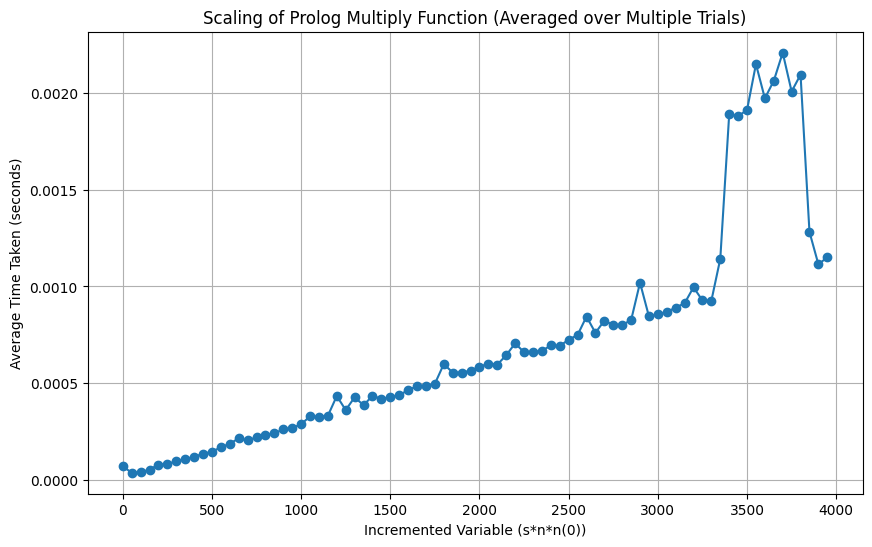

In [31]:
# Function to add two numbers using Prolog
def prolog_mult(x, y):
    result = list(prolog.query(f"mult({x}, {y}, Z)"))
    return result[0]['Z'] if result else None

# Keeping the first variable constant and incrementing the second variable
constant_var = "2"  # Keeping the first variable as 0
scaling_results = []
num_trials = 200  # Number of trials for averaging

for i in range(0, 4000, 50):  # Test for the first 30 natural numbers
    incremented_var = "s(" * i + "0" + ")" * i  # Incrementing the second variable
    total_time = 0

    for _ in range(num_trials):
        start_time = time.time()
        result = prolog_mult(incremented_var, constant_var)
        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_trials
    scaling_results.append((i, average_time))

# Extract data for plotting
x_values = [result[0] for result in scaling_results]
y_values = [result[1] for result in scaling_results]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title("Scaling of Prolog Multiply Function (Averaged over Multiple Trials)")
plt.xlabel("Incremented Variable (s*n*n(0))")
plt.ylabel("Average Time Taken (seconds)")
plt.grid(True)
plt.show()

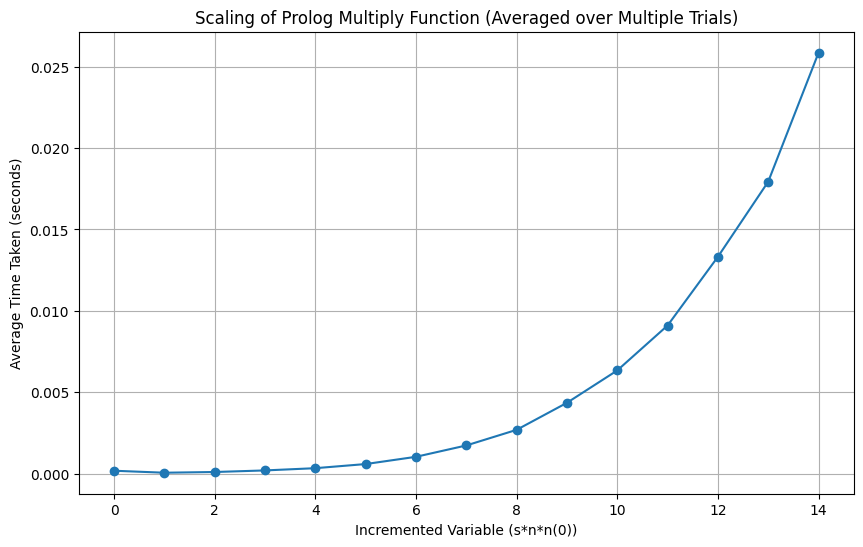

In [22]:
# Function to add two numbers using Prolog
def prolog_mult(x, y):
    result = list(prolog.query(f"mult({x}, {y}, Z)"))
    return result[0]['Z'] if result else None

# Keeping the first variable constant and incrementing the second variable
constant_var = "1"  # Keeping the first variable as 0
scaling_results = []
num_trials = 50  # Number of trials for averaging

for i in range(0, 15):  # Test for the first 30 natural numbers
    incremented_var = "s(" * i + "0" + ")" * i  # Incrementing the second variable
    total_time = 0

    for _ in range(num_trials):
        start_time = time.time()
        result = prolog_mult(incremented_var, incremented_var)
        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_trials
    scaling_results.append((i, average_time))

# Extract data for plotting
x_values = [result[0] for result in scaling_results]
y_values = [result[1] for result in scaling_results]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title("Scaling of Prolog Multiply Function (Averaged over Multiple Trials)")
plt.xlabel("Incremented Variable (s*n*n(0))")
plt.ylabel("Average Time Taken (seconds)")
plt.grid(True)
plt.show()

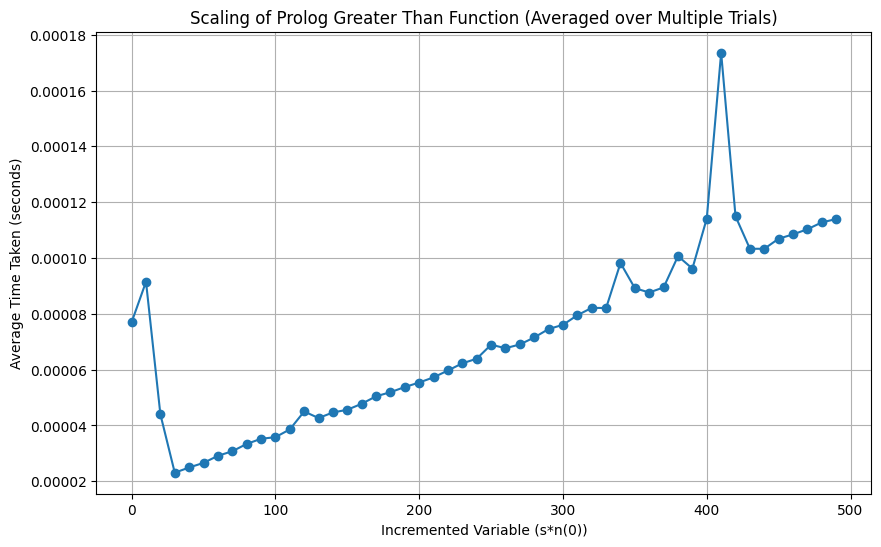

In [ ]:
# Function to add two numbers using Prolog
def prolog_greater_than(x, y):
    result = list(prolog.query(f"greater_than({x}, {y})"))
    return result[0] if result else None

# Keeping the first variable constant and incrementing the second variable
constant_var = "1"  # Keeping the first variable as 0
scaling_results = []
num_trials = 50  # Number of trials for averaging

for i in range(0, 500, 10):  # Test for the first 30 natural numbers
    incremented_var = "s(" * i + "0" + ")" * i  # Incrementing the second variable
    total_time = 0

    for _ in range(num_trials):
        start_time = time.time()
        result = prolog_greater_than(constant_var, incremented_var)
        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_trials
    scaling_results.append((i, average_time))

# Extract data for plotting
x_values = [result[0] for result in scaling_results]
y_values = [result[1] for result in scaling_results]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title("Scaling of Prolog Greater Than Function (Averaged over Multiple Trials)")
plt.xlabel("Incremented Variable (s*n(0))")
plt.ylabel("Average Time Taken (seconds)")
plt.grid(True)
plt.show()